In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_df.select_dtypes("object").describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
# Handling missing values
titanic_df.dropna(subset=['Embarked'], inplace=True)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Creating new features
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['IsAlone'] = (titanic_df['FamilySize'] == 1).astype(int)
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_df['Title'] = titanic_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')
titanic_df['Title'] = titanic_df['Title'].replace(['Capt', 'Col', 'Major'], 'Officer')
titanic_df['Title'] = titanic_df['Title'].replace(['Jonkheer', 'Don', 'Sir', 'Countess', 'Lady'], 'Royalty')
titanic_df['Title'] = titanic_df['Title'].replace(['Rev'], 'Clergy')

# Dropping unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,male,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,female,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,female,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,male,35.0,0,0,8.0500,S,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,1,Clergy
887,1,1,female,19.0,0,0,30.0000,S,1,1,Miss
888,0,3,female,28.0,1,2,23.4500,S,4,0,Miss
889,1,1,male,26.0,0,0,30.0000,C,1,1,Mr


In [8]:
# Calculating summary statistics
titanic_df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,1.906637,0.601800
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,1.614703,0.489803
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000


In [9]:
titanic_df.select_dtypes("object").describe()

,Sex,Embarked,Title
count,889,889,889
unique,2,3,9
top,male,S,Mr
freq,577,644,517


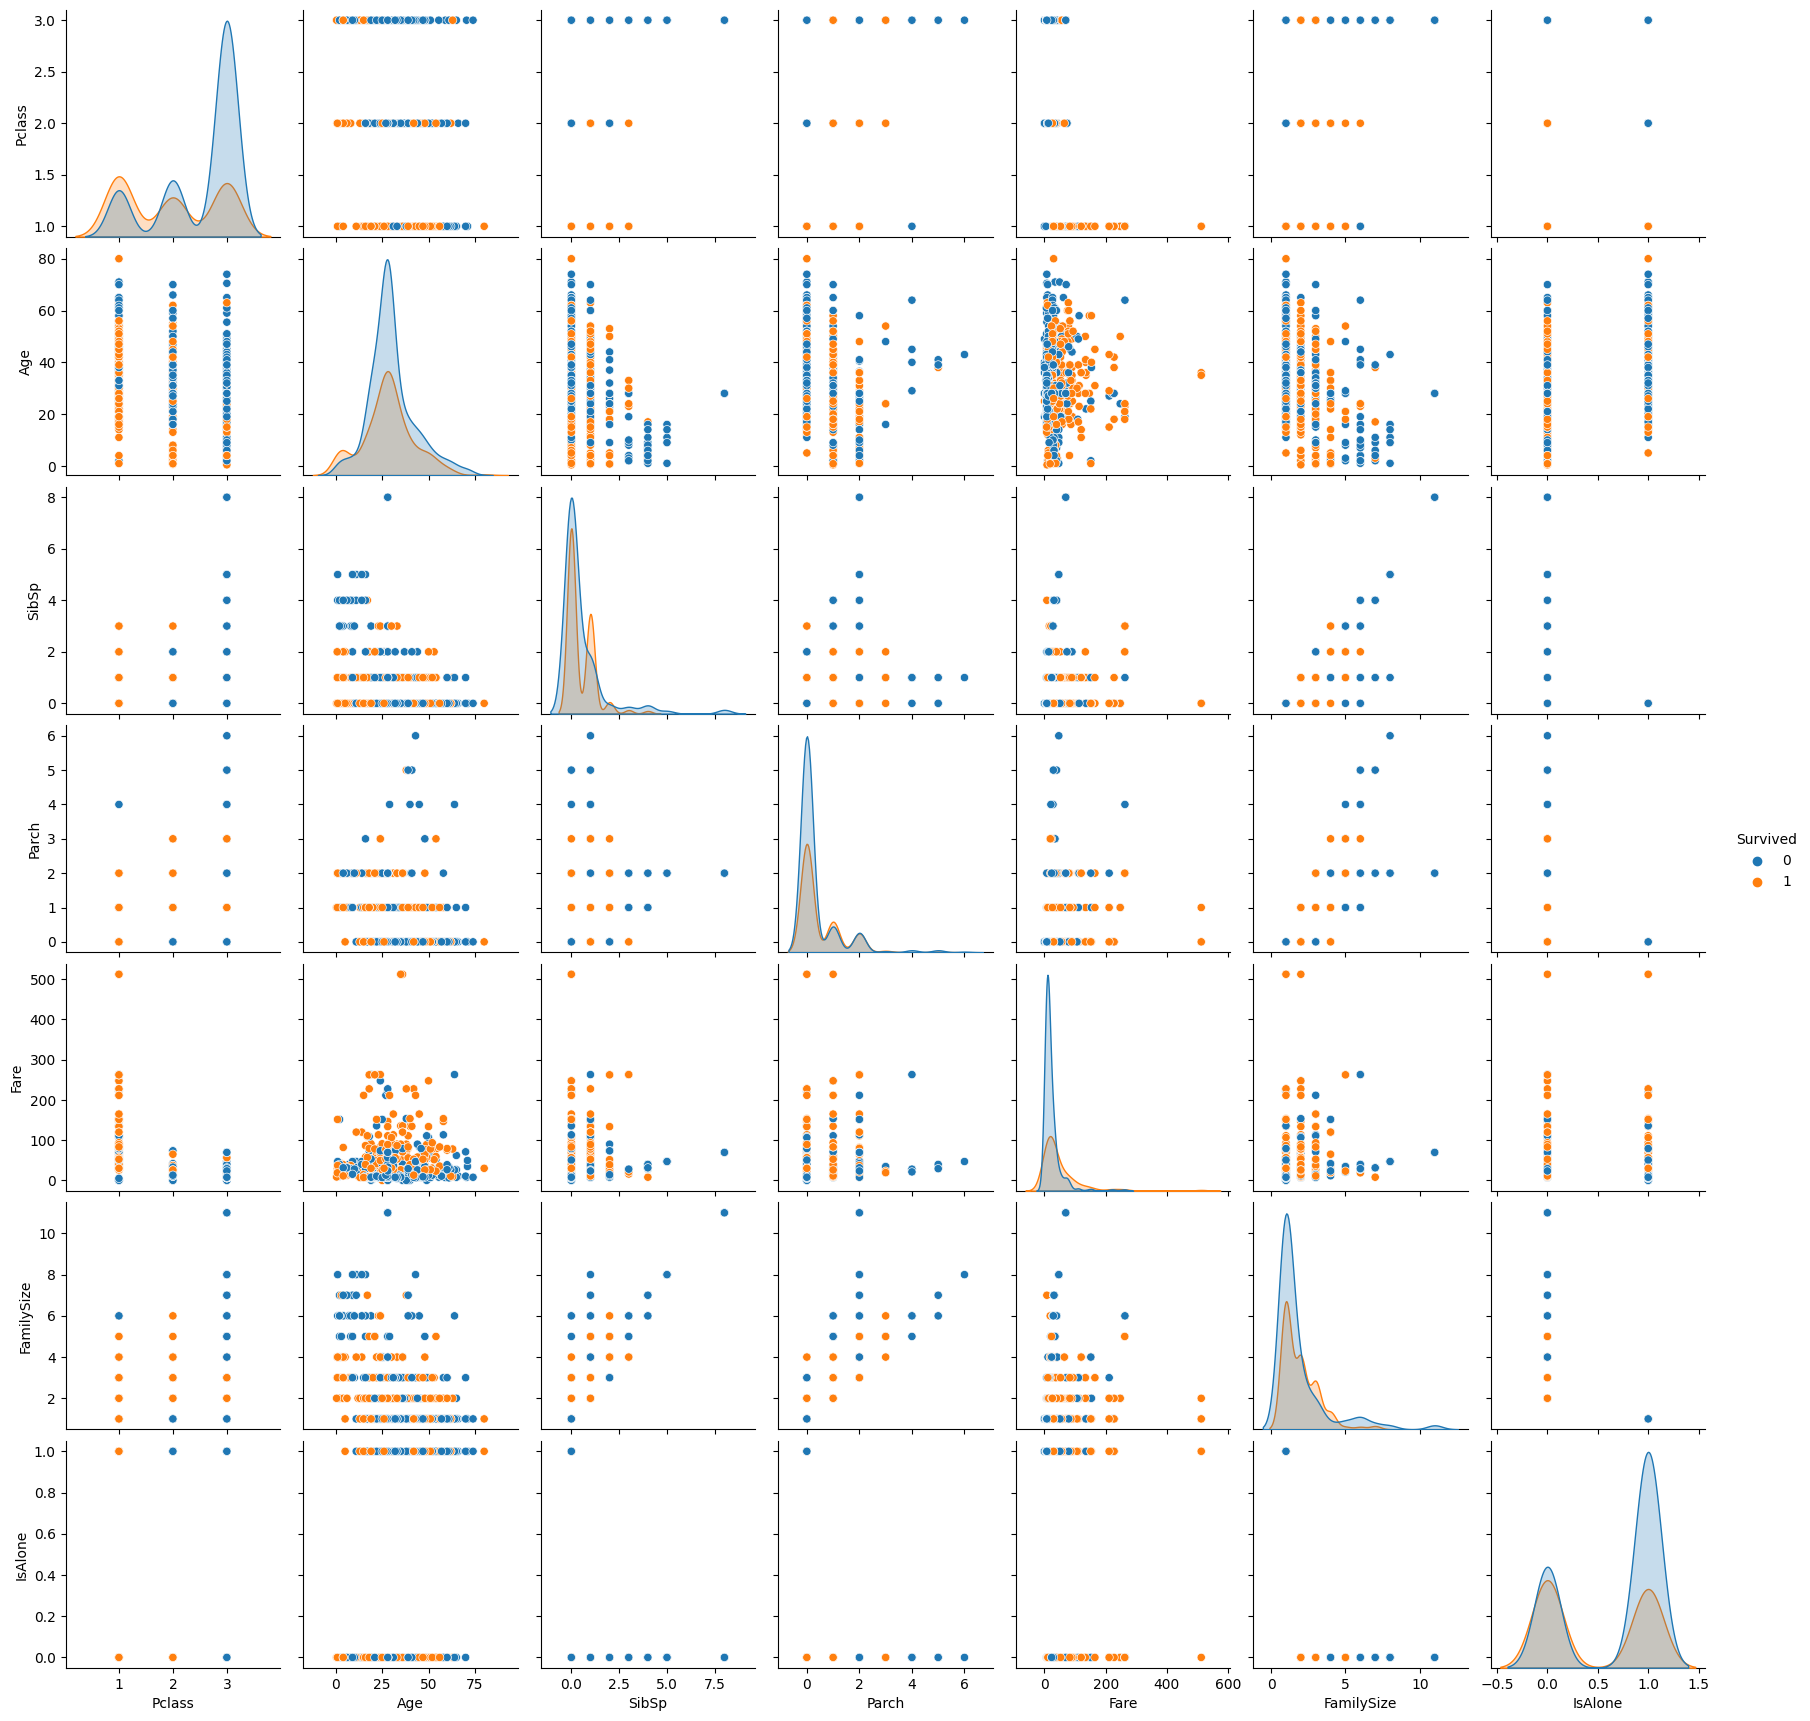

In [10]:
# Exploring relationships between variables
sns.pairplot(titanic_df, hue='Survived')

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

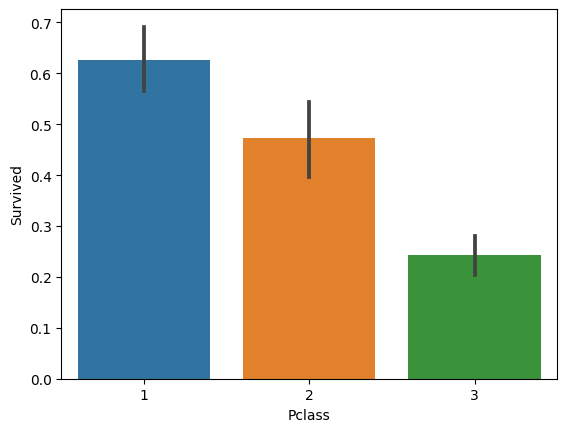

In [11]:
# Identifying trends or patterns
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

C:\Users\USER\AppData\Local\Temp\ipykernel_2020\327301757.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_df.corr(), annot=True)


<AxesSubplot: >

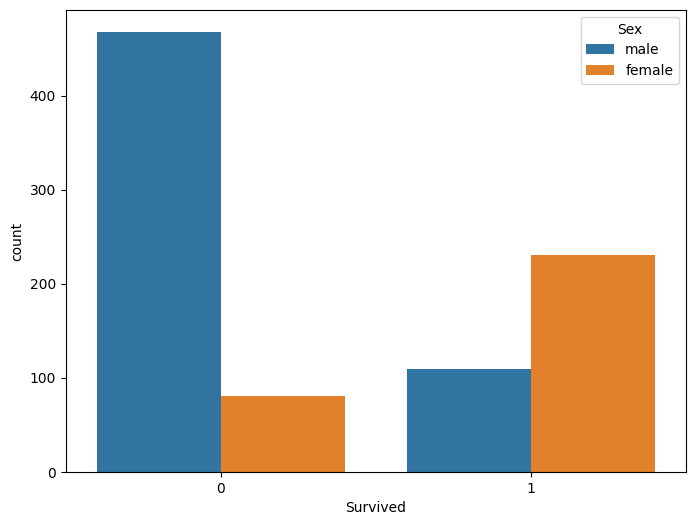

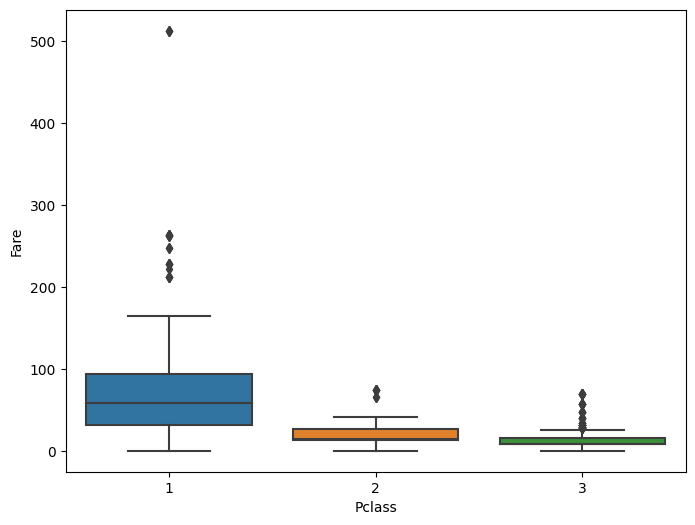

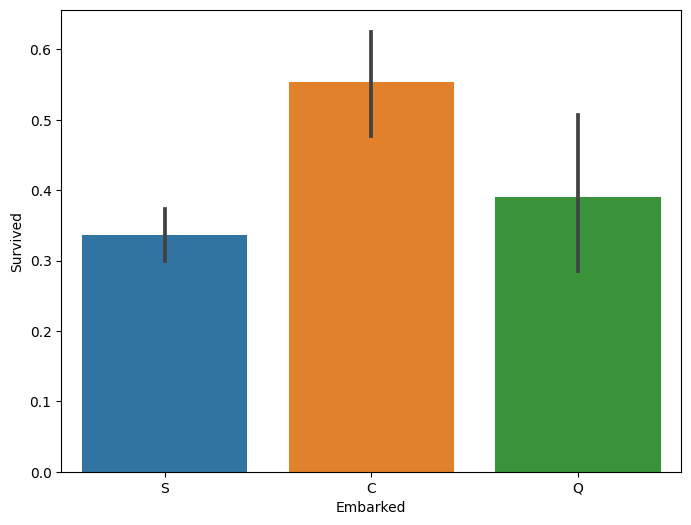

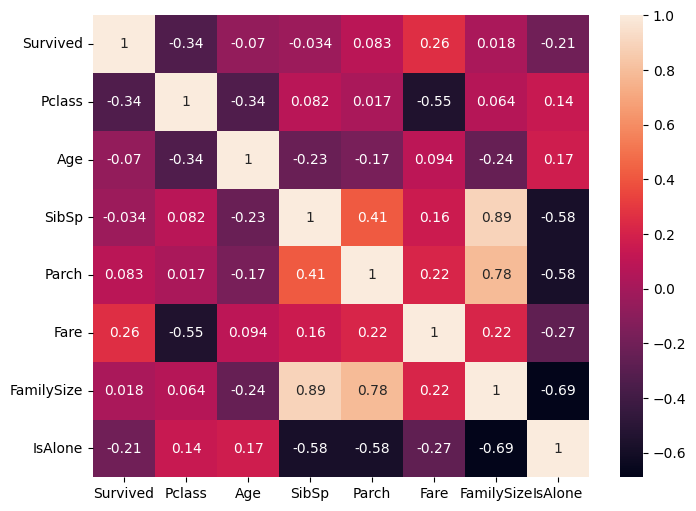

In [12]:
# Creating meaningful charts and graphs
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Sex', data=titanic_df)

plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)

plt.figure(figsize=(8,6))
sns.barplot(x='Embarked', y='Survived', data=titanic_df)

plt.figure(figsize=(8,6))
sns.heatmap(titanic_df.corr(), annot=True)


In [13]:
df = titanic_df

In [14]:
df = df.drop(['SibSp','Parch'], axis = 1)
df['Sex'] = df['Sex'].replace(['Male','Female'],[0,1])
df = pd.get_dummies(df)

In [26]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [27]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building Models

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

model_evaluation = {}

def metrics(y_test, y_pred):
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)

def buildModels(X_train, X_test, y_train, y_test):
    # Logistic Regression
    LR= LogisticRegression()
    LR.fit(X_train,y_train)
    y_prob = LR.predict_proba(X_test)[:,1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    model_evaluation['Logistic Regression'] = metrics(y_test, y_pred)

    # Ridge Logistic Regression
    LR_ridge= LogisticRegression(penalty='l2')
    LR_ridge.fit(X_train,y_train)
    y_prob = LR_ridge.predict_proba(X_test)[:,1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    model_evaluation['Ridge Logistic Regression'] = metrics(y_test, y_pred)

    # Gaussian Naive Bayes
    model_naive = GaussianNB()
    model_naive.fit(X_train, y_train)
    y_prob = model_naive.predict_proba(X_test)[:,1] 
    y_pred = np.where(y_prob > 0.5, 1, 0)
    model_evaluation['Gaussian Naive Bayes'] = metrics(y_test, y_pred)

    # Support Vector Machine
    model_svm = svm.SVC()
    model_svm.fit(X_train, y_train)
    y_pred = model_svm.predict(X_test)
    model_evaluation['SVM'] = metrics(y_test, y_pred)

    # Random Forest
    model_RR=RandomForestClassifier()
    model_RR.fit(X_train,y_train)
    y_prob = model_RR.predict_proba(X_test)[:,1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    model_evaluation['Random Forest'] = metrics(y_test, y_pred)

    # Neural Network
    mlp = MLPClassifier()
    mlp.fit(X_train,y_train)
    y_prob = mlp.predict_proba(X_test)[:,1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    model_evaluation['Neural Network'] = metrics(y_test, y_pred)

buildModels(X_train, X_test, y_train, y_test)



c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [72]:
model_eval = pd.DataFrame.from_dict(model_evaluation, orient='index',
                       columns=['accuracy', 'precision', 'recall', 'f1 score'])
model_eval

,accuracy,precision,recall,f1 score
Logistic Regression,0.831461,0.767123,0.788732,0.831461
Ridge Logistic Regression,0.831461,0.767123,0.788732,0.831461
Gaussian Naive Bayes,0.803371,0.712500,0.765101,0.803371
SVM,0.685393,0.709677,0.440000,0.685393
Random Forest,0.775281,0.688312,0.726027,0.775281
Neural Network,0.786517,0.706667,0.736111,0.786517


## Conclusion

From the machine learning result above, we can see that the logistic regression model achieves the best predictability for surviving Titanic. 